# E-COMMERCE DATA ANALYSIS USING PYTHON
#### Here are some potential analyses we are going to perform:

1. Customer Analysis:
    - Identify the total number of customers city wise.
    - Identify the most frequent customers based on their order history.
2. Product Analysis:
    - Determine the total number of products available by category.
    - Analyze the distribution of products across sub-categories.
    - Identify products with low stock levels.
    - Calculate the average, maximum, and minimum prices for products.
3. Order Analysis:
    - Calculate the top 10 orders product wise.
    - Analyze the order status distribution (e.g., pending, delivered).
    - Identify the most popular products based on order quantity.
4. Sales Analysis:
    - Calculate total revenue generated from orders product wise.
    - Calculate the total revenue generated from all orders
    - Calculate total revenue product category wise percentage.
    - Analyze the performance of different product categories in terms of sales.
    - Identify the most profitable products based on the difference between original and selling prices.
5. Customer Order Patterns:
    - Identify product names with the highest and lowest order quantities.
    - Identify customers with the highest and lowest order quantities by customer name.
    - Determine the most preferred payment modes.
6. Time-based Analysis:
    - Month wise total sales.
    - Month and year wise total sales
    - Identify peak order date.
7. Geographical Analysis:
    - Explore the distribution of customers across different cities.
    - Analyze whether certain products or categories are more popular in a specific city.
8. Product Performance:
    - Identify the top 10 best-selling products.
    - Identify top 10 slow-moving products based on low sales.
9. Customer Retention:
    - Analyze repeat customers and their order patterns.
    - Calculate customer retention rates over time.
10. Payment Analysis:
    - Display successful and pending payments order countssful and pending payments order counts.

### import libraries and Database Connectivity

In [28]:
import mysql.connector
import pandas as pd 
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import numpy as np
# replace 'your_username,'your_password','your_host' and 'your_database' with actual credential
connection = mysql.connector. connect(
host='localhost',
user='root',
password='Pragya98',
database='ecommerce'
)

#Create a cursor object to execute SQL queries
cursor= connection.cursor()

#Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data =pd.DataFrame (cursor.fetchall(), columns= [desc[0] for desc in cursor.description])

# Query data from the 'product' toble
cursor.execute('SELECT  * FROM product')
product_data= pd.DataFrame (cursor.fetchall(), columns= (desc[0] for desc in cursor.description))


#Query data from the 'order-details' table
cursor.execute('SELECT * FROM order_details')
order_data= pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
#printing first 5 records from each table
print (customer_data.head())
print(product_data.head())
print(order_data.head())

  customer_id     name              city                  email    phone_no  \
0       C1001    Steve             Tokyo        steve@gmail.com  4567897652   
1       C1002     john            Sydney         john@gmail.com  9987234567   
2       C1003    Peter          Kanagawa  peter.parker@mail.com  9969834567   
3       C1004  Jackson             Tokyo      Jackson@gmail.com  7765834567   
4       C1005     Jack  Lake Buena Vista         Jack@gmail.com  8876345678   

                    address  pin_code  
0                  f.g.road        99  
1                  k.c.road     75001  
2             2F Ikenobecho       171  
3           24-2, Sendagaya      8429  
4  1520 E Buena Vista Drive     32830  
  product_id product_name     category sub_category  original_price  \
0       P102        Chair    furniture       Chairs         20000.0   
1       P103       Laptop  Electronics     computer         60000.0   
2       P104   Smartphone  Electronics        phone         45000.0   
3

# Customer Analysis:
### Identify total number of customers city wise

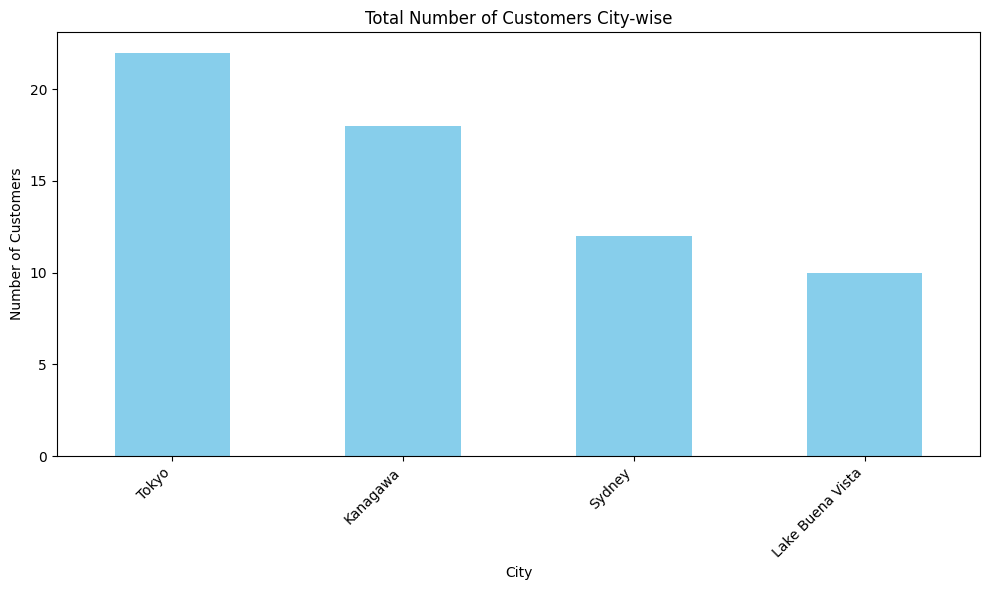

In [29]:
#identify total number of customers city wise
city_counts= customer_data['city'].value_counts()
#Plotting the bar graph
plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar', color= 'skyblue')
plt.title('Total Number of Customers City-wise')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation= 45, ha= 'right') #Rotate city names for better readabilit
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

### Identify the most frequent customers based on their order history

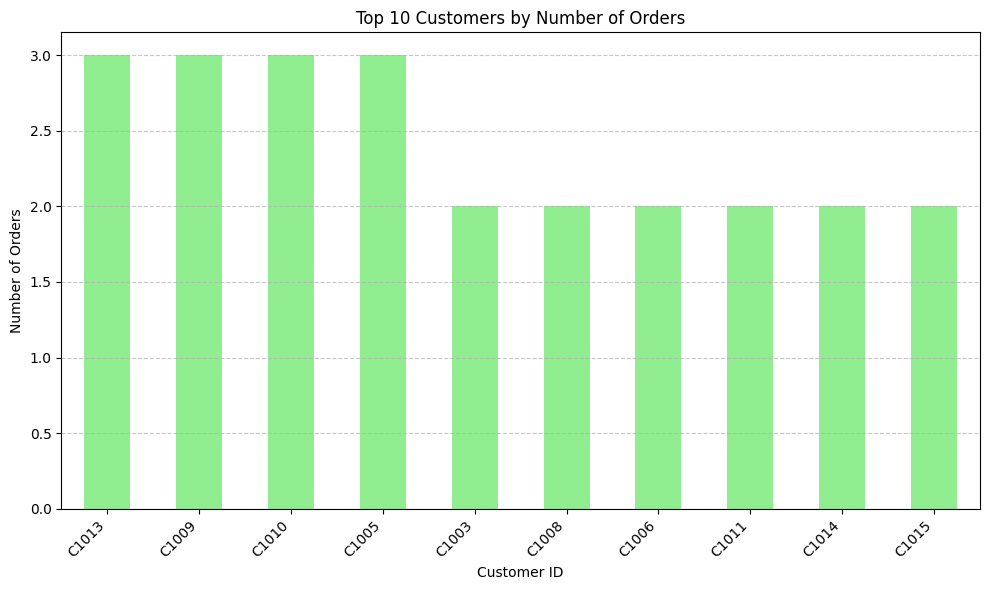

In [30]:
#identify the most frequent customers based on their order history
#calculate the number of orders for each customer 
customer_order_counts = order_data['customer_id'].value_counts()
# Get the top 10 customers with the highest number of orders
top_10_customers = customer_order_counts.head(10)

# Plotting the bar graph for top 10 customers
plt.figure(figsize=(10, 6))
top_10_customers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.grid(axis='y', linestyle='--',alpha=0.7)#add grid lines for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

# Product Analysis:
### determine the total number of products available by category

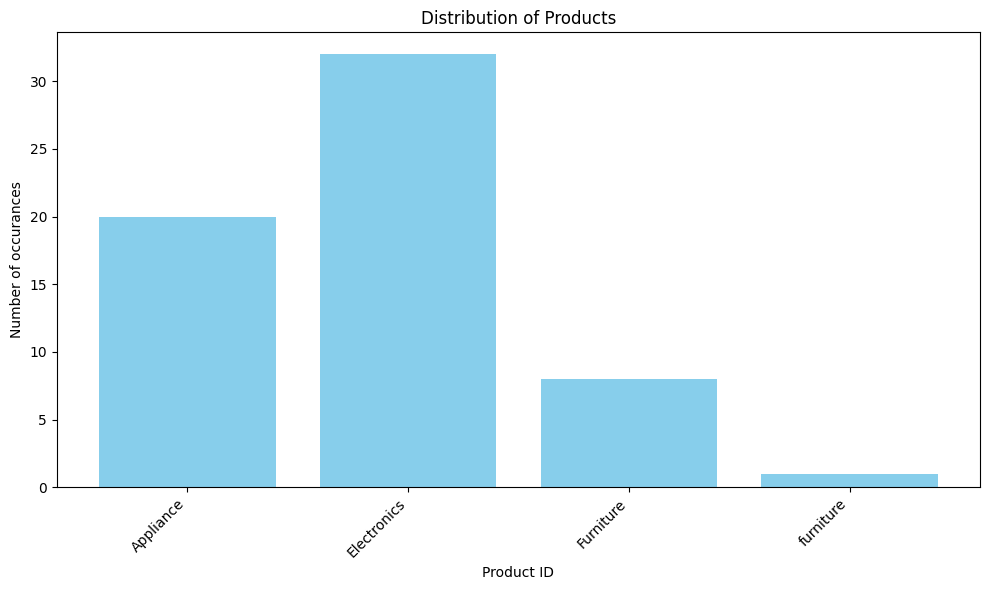

In [31]:

# #calculate the total number of products available in each category
distribution_of_product = product_data['category'].value_counts()
#sort the categories alphabetically
distribution_of_product=distribution_of_product.sort_index()

# Plotting the column chart for number of products 
plt.figure(figsize=(10, 6))
plt.bar(distribution_of_product.index,distribution_of_product.values, color='skyblue')
plt.title('Distribution of Products')
plt.xlabel('Product ID')
plt.ylabel('Number of occurances')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

### Analyze the distribution of products across sub-categories

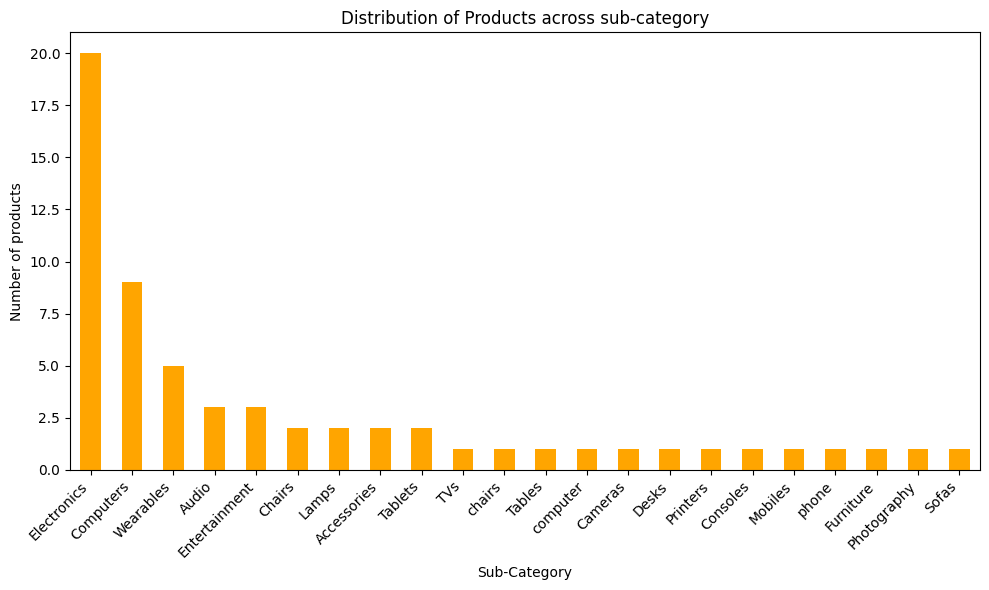

In [32]:

# number of products in sub category
distribution_of_product_by_subcategory = product_data['sub_category'].value_counts()

# Plotting the bar graph 
plt.figure(figsize=(10, 6))
distribution_of_product_by_subcategory .plot(kind='bar', color='orange')
plt.title('Distribution of Products across sub-category')
plt.xlabel('Sub-Category')
plt.ylabel('Number of products')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

### Identify products with low stock levels.

<Figure size 1000x600 with 0 Axes>

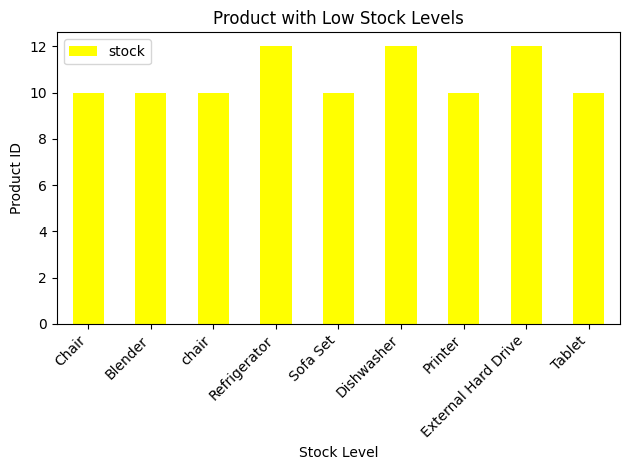

In [33]:
# identify products with low stock levels
#filer products with low stock levels (for example below 10)
low_stock_products = product_data[product_data['stock']< 15]
#create a  bar chart
plt.figure(figsize=(10, 6))
low_stock_products.plot(kind='bar', x='product_name' , y='stock', color='yellow')
plt.xlabel('Stock Level')
plt.ylabel('Product ID')
plt.title('Product with Low Stock Levels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Calculate the average, maximum, and minimum selling prices for products

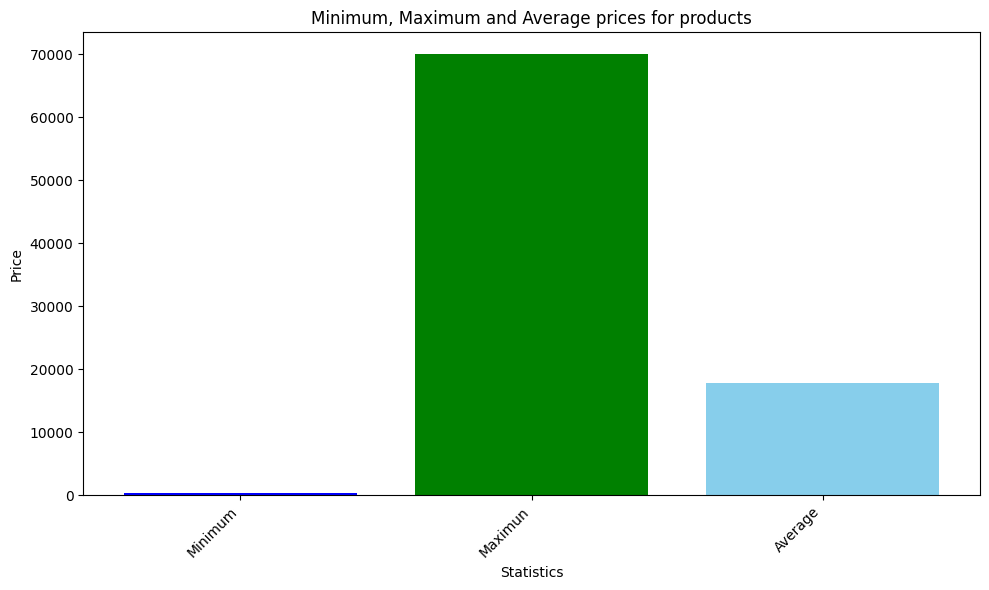

In [34]:
#Calculate the average, maximum, and minimum selling prices for products.
#Calculate the average, maximum, and minimum selling prices
minimun_selling_price=product_data['selling_price'].min()
maximun_selling_price=product_data['selling_price'].max()
average_selling_price=product_data['selling_price'].mean()
colors=['blue','green','skyblue']
#plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(['Minimum','Maximun','Average'],[minimun_selling_price,maximun_selling_price,average_selling_price], color=colors)
plt.xlabel('Statistics')
plt.ylabel('Price')
plt.title('Minimum, Maximum and Average prices for products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Order Analysis:
### Calculate the top 10 orders product wise.

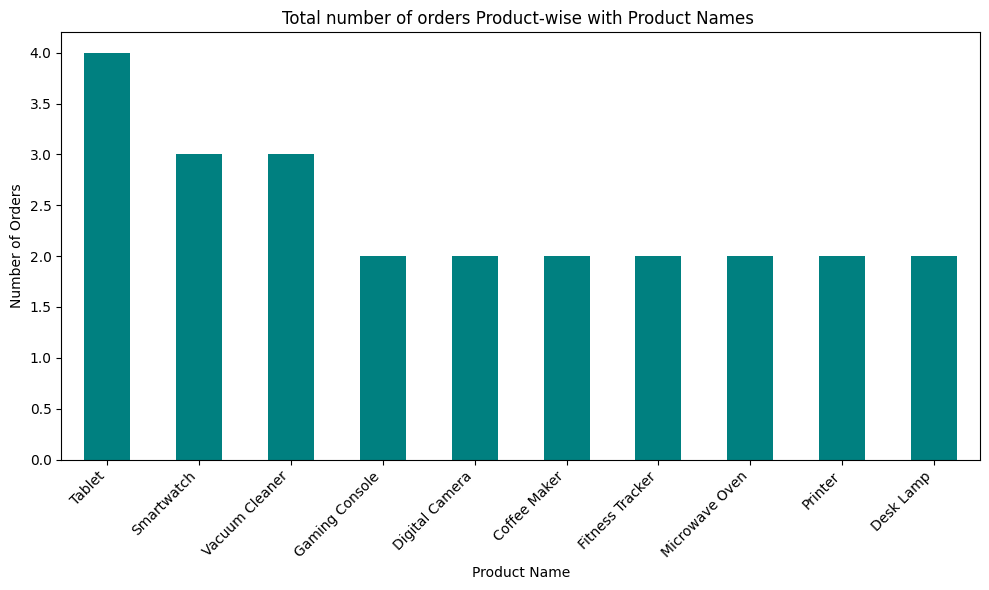

In [35]:

# top 10 orders
top_10_order = product_data['product_name'].value_counts().head(10)

# Plotting the bar graph 
plt.figure(figsize=(10, 6))
top_10_order.plot(kind='bar', color='teal')
plt.title('Total number of orders Product-wise with Product Names ')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

### Analyze the order status distribution (e.g., pending, delivered).

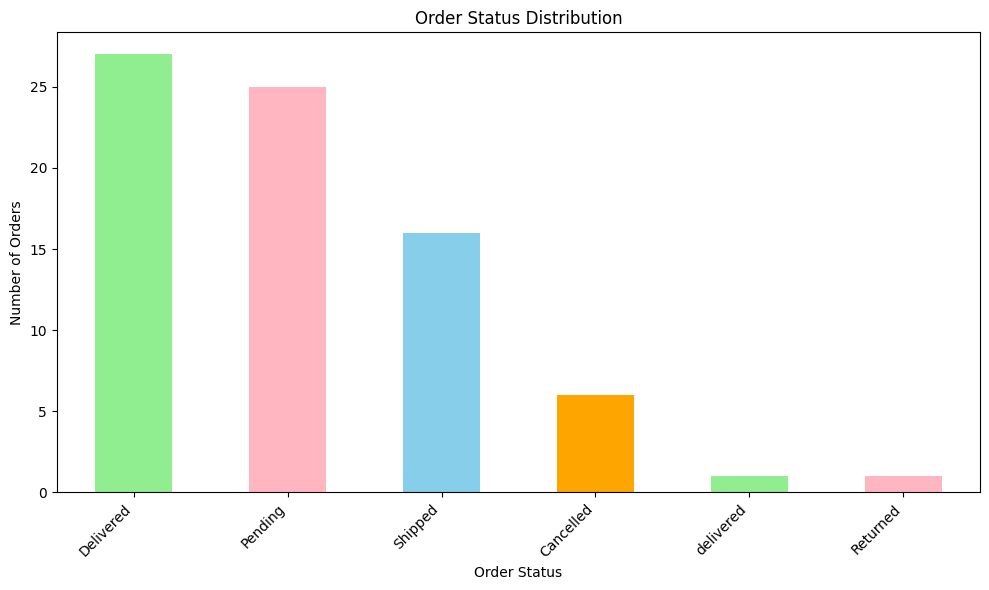

In [36]:
# number of orders for each order status
order_status_count= order_data['order_status'].value_counts()

# Plotting the bar graph 
plt.figure(figsize=(10, 6))
order_status_count.plot(kind='bar', color=['lightgreen','lightpink','skyblue','orange'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

### Identify the most popular products based on order quantity

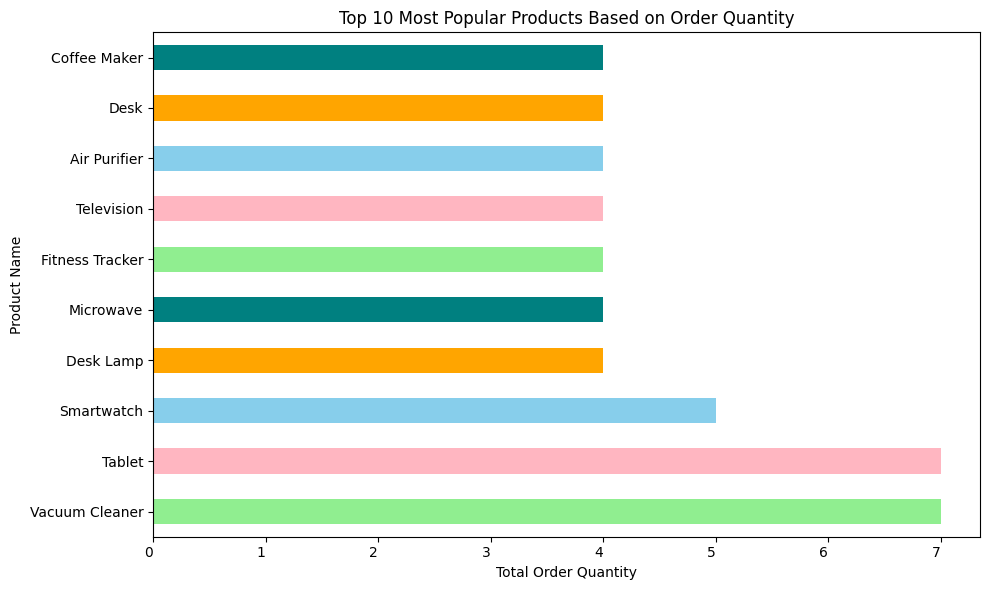

In [37]:

#merge order data with product data based on product ID
merged_data = pd.merge (order_data, product_data, on='product_id')

#group merged data by product name and sum the quantites
product_quantity= merged_data.groupby('product_name')['quantity'].sum()

#sort products based on total quantity sold
top_products=product_quantity.sort_values(ascending=False).head(10)
# Plotting the horizontal bar graph 
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh',color=['lightgreen','lightpink','skyblue','orange','teal'])
plt.title('Top 10 Most Popular Products Based on Order Quantity')
plt.xlabel('Total Order Quantity')
plt.ylabel('Product Name')
plt.xticks(rotation=0, ha='right') # Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

# Sales Analysis:
### Calculate total revenue generated from orders product wise.

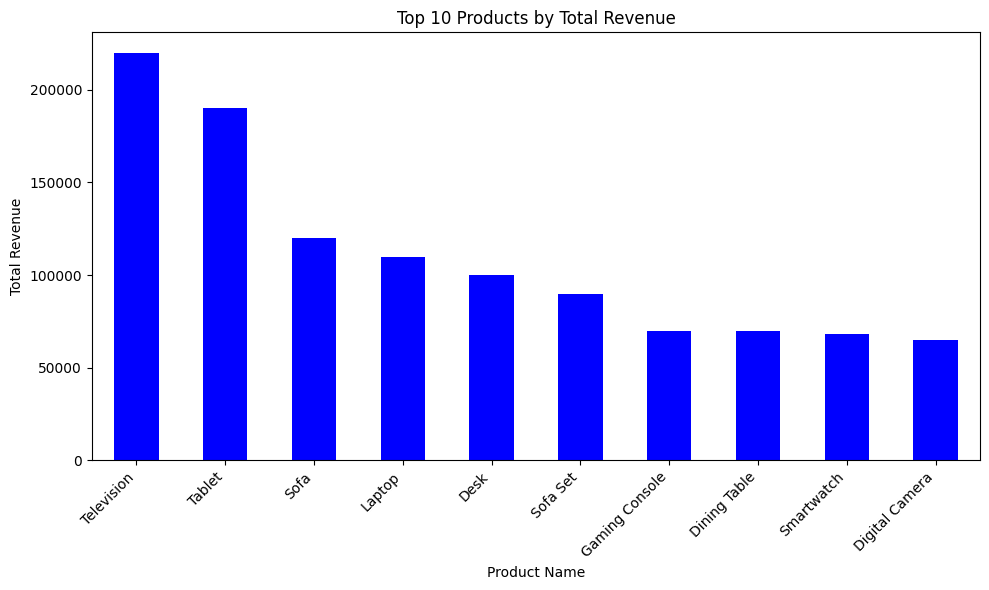

In [38]:
#merge order data with product data based on product ID
merged_data = pd.merge (order_data, product_data, on='product_id')

#Calculate revenue for each order 
merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

#Group merged data by product name and sum the revenues 
product_revenue =merged_data.groupby('product_name') ['revenue'].sum()

#Sort products based on total revenue generated
top_products_revenue = product_revenue.sort_values(ascending=False).head (10)

#Create a bar plot
plt.figure(figsize=(10, 6))
top_products_revenue.plot(kind='bar', color='blue') 
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue') 
plt.xticks (rotation=45, ha='right')# Rotate customer IDs for better readability
plt.tight_layout() # Adjust Layout to prevent clipping of Labels
plt.show()

### Calculate the total revenue generated from all orders

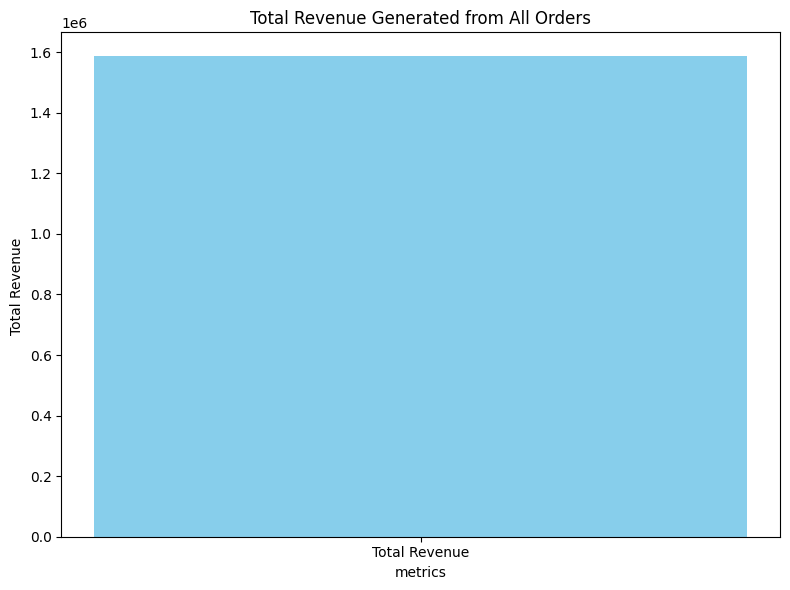

In [39]:
#Calculate total revenue generated from all orders
total_revenue_all_orders = order_data['total_price'].sum()

#plotting Bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Revenue'], [total_revenue_all_orders], color='skyblue')
plt.title('Total Revenue Generated from All Orders')
plt.ylabel('Total Revenue ')
plt.xlabel('metrics')
plt.tight_layout()
plt.show()

### Calculate total revenue product category wise percentage.

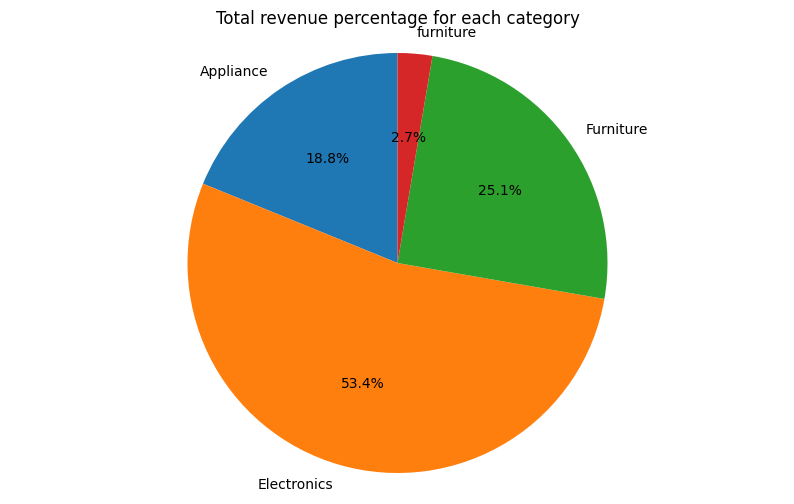

In [41]:
#merge category column from  product_data into merged data
merged_data = pd.merge (merged_data, product_data[['product_id','category']], on='product_id')

# #Calculate revenue for each order 
# merged_data['revenue'] = merged_data['quantity'] * merged_data['selling_price']

#Group merged data by product category and sum the revenues 
category_revenue =merged_data.groupby('category') ['revenue'].sum()

#Calculate revenue across all categories 
total_revenue=category_revenue.sum()

#Calculate percentage revenue for each categories 
percentage_revenue=(category_revenue/total_revenue)*100

#Create a pie plot
plt.figure(figsize=(10, 6))
plt.pie(percentage_revenue, labels=percentage_revenue.index, autopct='%1.1f%%' ,startangle=90)
plt.title('Total revenue percentage for each category')
plt.axis('equal')
plt.show()

### Identify the most profitable products based on the difference between original and selling prices.

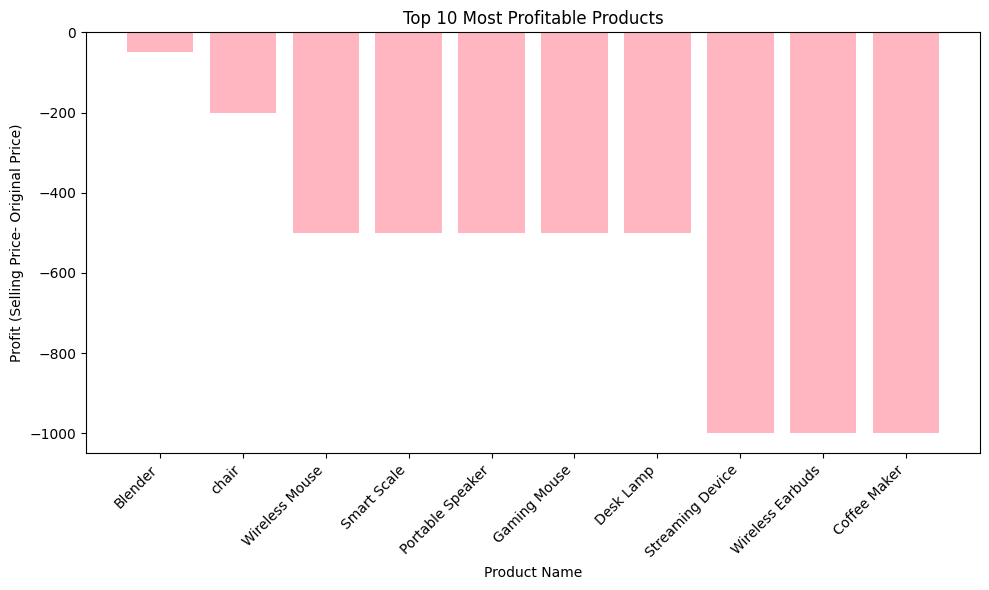

In [42]:
# Calculate the profit for each product 
product_data['profit'] = product_data['selling_price'] - product_data['original_price']

#Sort products based on profit 
most_profitable_products= product_data.sort_values(by='profit', ascending=False).head(10)

# Create a bar chart to visualize the most profitable products
plt.figure(figsize=(10, 6)) 
plt.bar(most_profitable_products['product_name'], most_profitable_products['profit'], color='lightpink') 
plt.title('Top 10 Most Profitable Products') 
plt.xlabel('Product Name')
plt.ylabel('Profit (Selling Price- Original Price)')
plt.xticks (rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Customer Order Patterns:
### Identify product names with the highest and lowest order quantities.

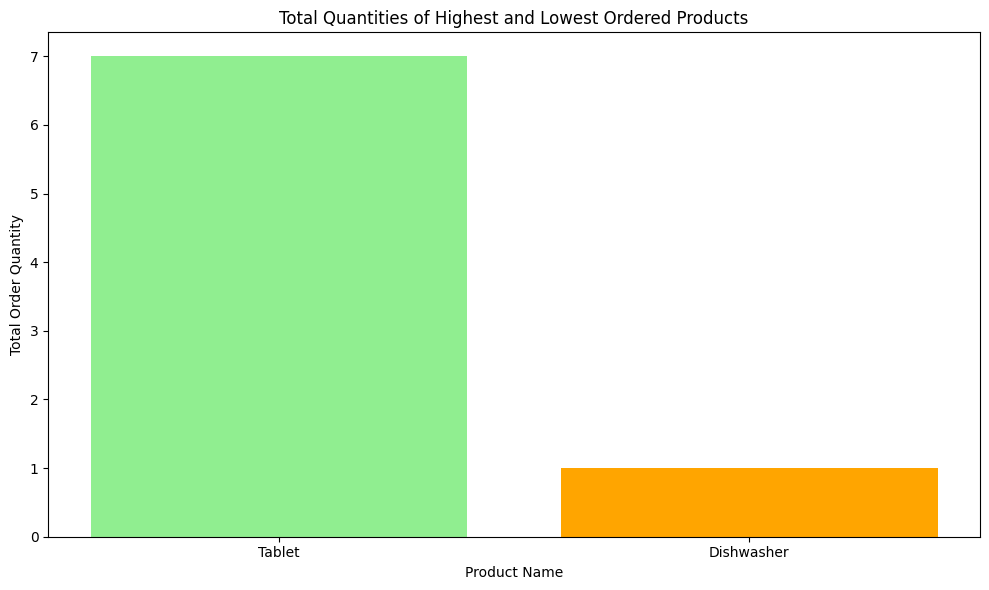

Product with the highest order quantity: Tablet
Highest order quantity: 7.0
Product with the lowest order quantity: Dishwasher
Lowest order quantity: 1.0


In [43]:
#merged order data with product data
merged_data=pd.merge(order_data,product_data,on ='product_id')

#group merged data by customer name and sum the quantites
product_quantity_sold= merged_data.groupby('product_name')['quantity'].sum()

#Identify product with the highest order quantity
highest_quantity_product = product_quantity_sold.idxmax()
highest_quantity= product_quantity_sold.max()

#Identify product with the Lowest order quantity
lowest_quantity_product= product_quantity_sold.idxmin()
lowest_quantity = product_quantity_sold.min()

#Create a bar plot for highest and Lowest order quantities
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_product, lowest_quantity_product], [highest_quantity, lowest_quantity], color=['lightgreen', 'orange']) 
plt.title('Total Quantities of Highest and Lowest Ordered Products')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.tight_layout()
plt.show()

print("Product with the highest order quantity:", highest_quantity_product) 
print("Highest order quantity:", highest_quantity)
print("Product with the lowest order quantity:", lowest_quantity_product)
print("Lowest order quantity:", lowest_quantity)


### Identify customers with the highest and lowest order quantities by customer name.

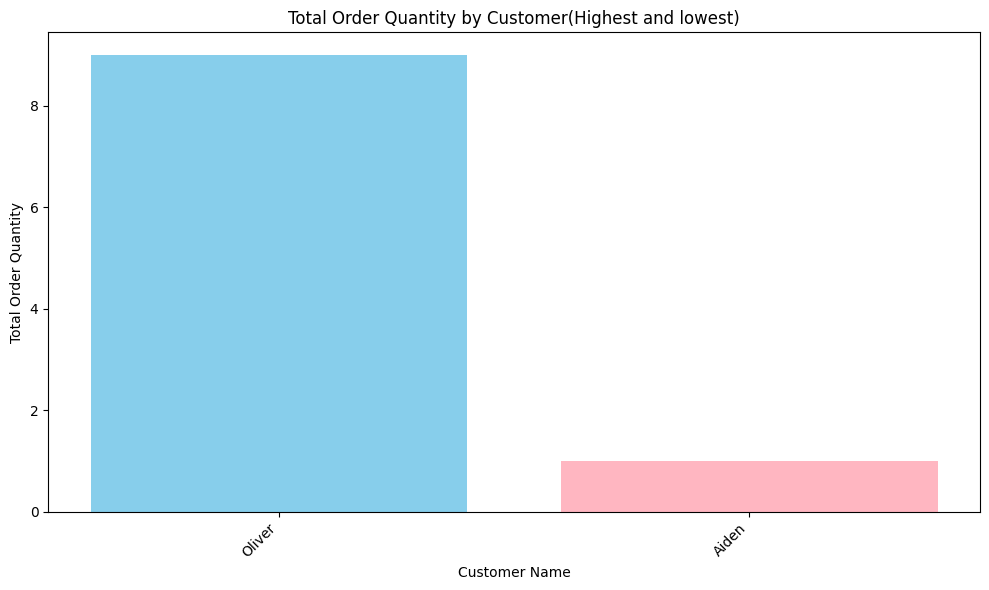

In [44]:
# Merge order_data with customer_data on 'customer_id' 
merged_data = pd.merge(order_data, customer_data, on='customer_id')

#Group merged data by customer name and sum the quantities 
customer_quantity_sold = merged_data.groupby('name') ['quantity'].sum()

#Identify customer with the highest order quantity 
highest_quantity_customer= customer_quantity_sold.idxmax() 
highest_quantity = customer_quantity_sold.max()

#Identify customer with the lowest order quantity 
lowest_quantity_customer =customer_quantity_sold.idxmin() 
lowest_quantity = customer_quantity_sold.min()

#Create a bar plot for highest and Lowest order quantities by customer 
plt.figure(figsize=(10, 6))
plt.bar([highest_quantity_customer, lowest_quantity_customer], [highest_quantity, lowest_quantity], color=['skyblue', 'lightpink']) 
plt.title('Total Order Quantity by Customer(Highest and lowest)') 
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.xticks (rotation=45,ha='right')
plt.tight_layout() 
plt.show()

### Determine the Most Preferred Payment Modes.

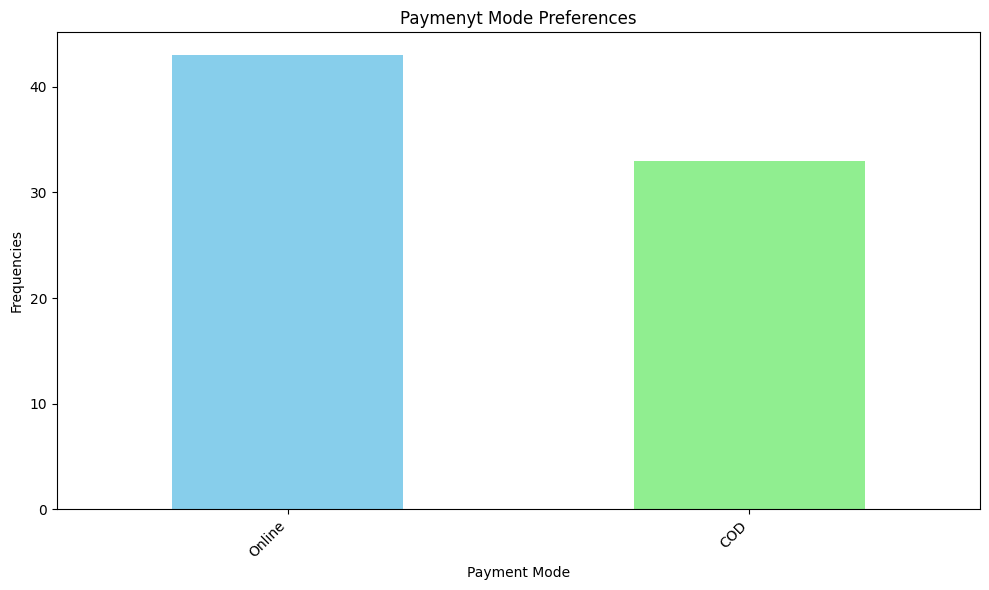

Most preferred payment mode: Online


In [45]:
# Group orders by payment mode and count the number of orders for each mode 
payment_mode_counts = order_data['payment_mode'].value_counts()

# Create a bar plot to visualize the distribution of payment modes 
plt.figure(figsize=(10, 6))
payment_mode_counts.plot(kind='bar', color=['skyblue','lightgreen']) 
plt.title('Paymenyt Mode Preferences')
plt.xlabel('Payment Mode')
plt.ylabel('Frequencies')
plt.xticks (rotation=45,ha='right')
plt.tight_layout()
plt.show()

#Print the most preferred payment mode
most_preferred_payment_mode =payment_mode_counts.idxmax()
print("Most preferred payment mode:", most_preferred_payment_mode)


# Time-based Analysis: 
### Month wise total sales

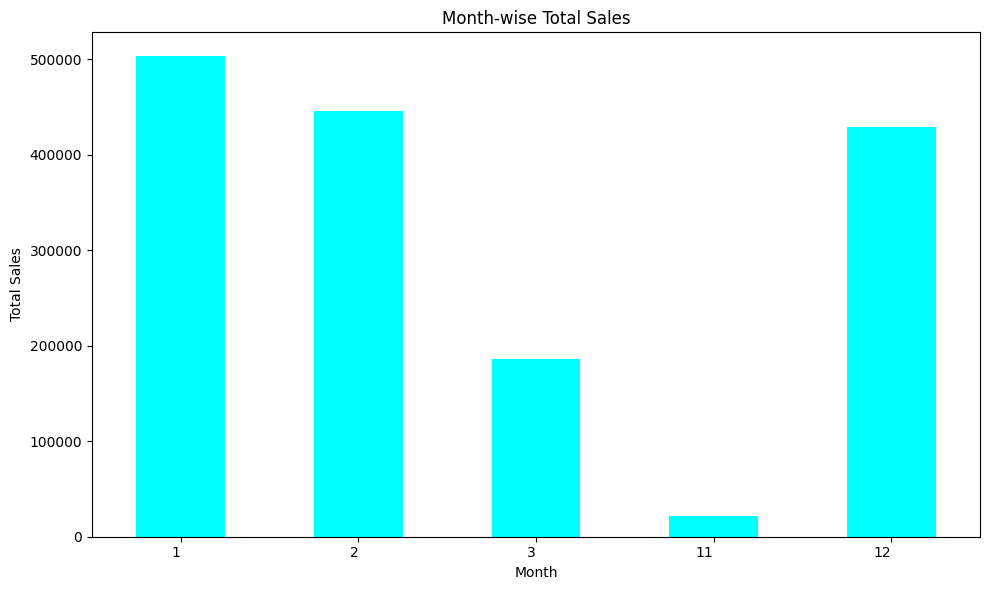

In [46]:
# Convert order date to datetime 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

#Extract month from order_date 
order_data['order_month'] = order_data['order_date'].dt.month

#Group orders by month and calculate total sales for each month 
monthly_sales= order_data.groupby('order_month') ['total_price'].sum()

#Create a bar plot to visualize month-wise total sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='cyan')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales') 
plt.xticks (rotation=0,ha='right')
plt.tight_layout()
plt.show()

### Month and year wise total sales

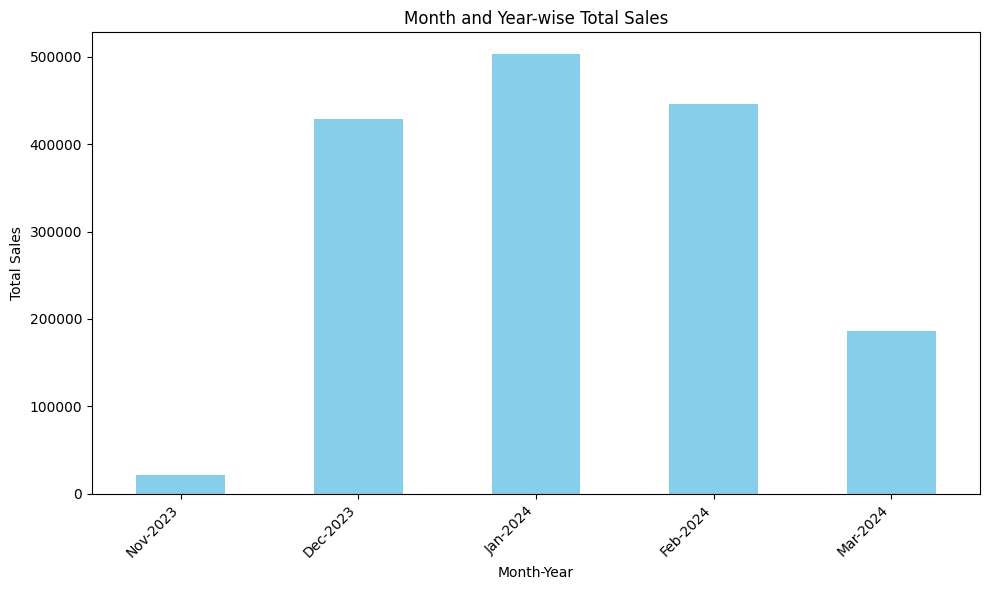

In [47]:
# Convert order date to datetime 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

#Extract year from order_date 
order_data['order_year'] = order_data['order_date'].dt.year
#Extract month from order_date 
order_data['order_month'] = order_data['order_date'].dt.month

#Group orders by month and year and calculate total sales for each combination
monthly_sales =order_data.groupby (['order_year','order_month'])['total_price'].sum()

#Create a bar plot 
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')

#Set x-axis Labels to month and year combinations 
labels =[f"{calendar.month_abbr[month]}-{year}" for year, month in monthly_sales.index] 
plt.xticks (range(len(monthly_sales)), labels, rotation=45, ha='right')
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month-Year') 
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

### Identify peak order date.

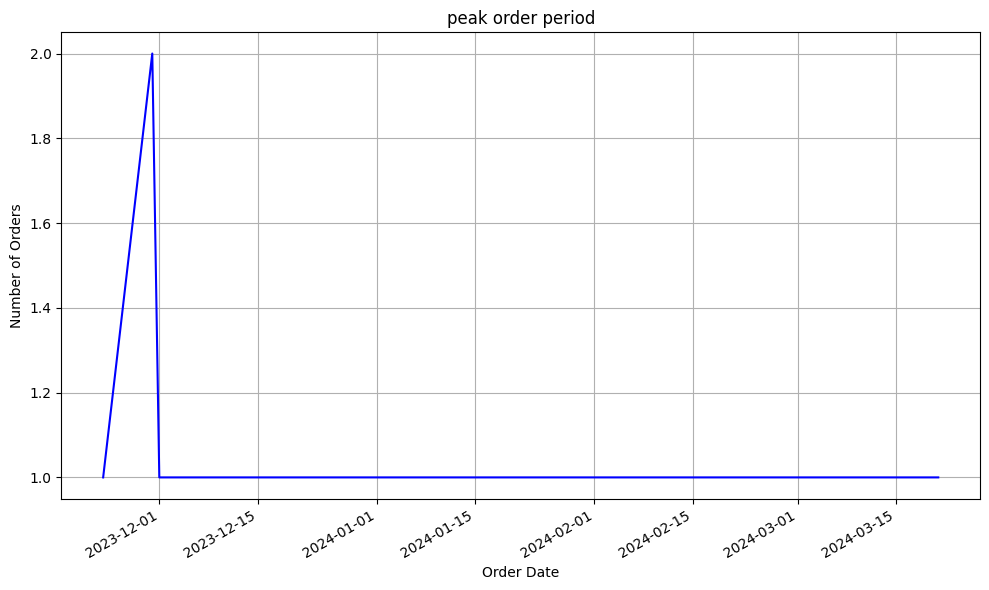

In [48]:
# Convert order date to datetime if it's not already in datetime format 
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

#Group orders by order date and count the number of orders for each date
daily_orders =order_data.groupby('order_date').size()

#Plot the peak order date
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', color='blue')
plt.title('peak order period')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


# Geographical Analysis:
### Explore the distribution of customers across different cities.

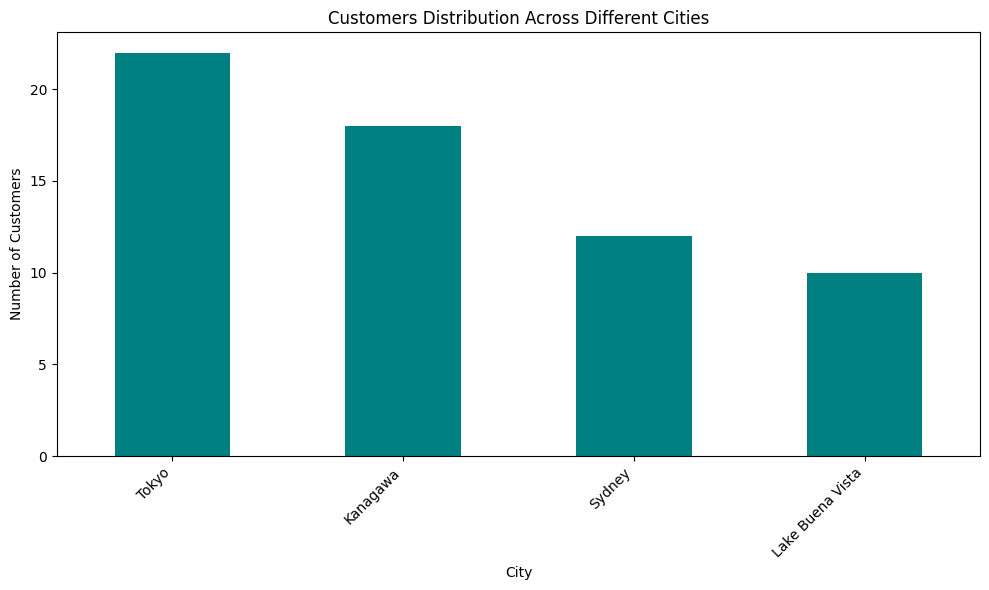

In [49]:
# Group customers by city and count the number of customers in each city 
city_distribution= customer_data['city'].value_counts()

# Plot the distribution of customers across different cities
plt.figure(figsize=(10, 6))
city_distribution.plot(kind='bar', color='teal')
plt.title('Customers Distribution Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers') 
plt.xticks (rotation=45, ha='right')
plt.tight_layout()
plt.show()



### Analyze whether certain products or categories are more popular in a specific city.

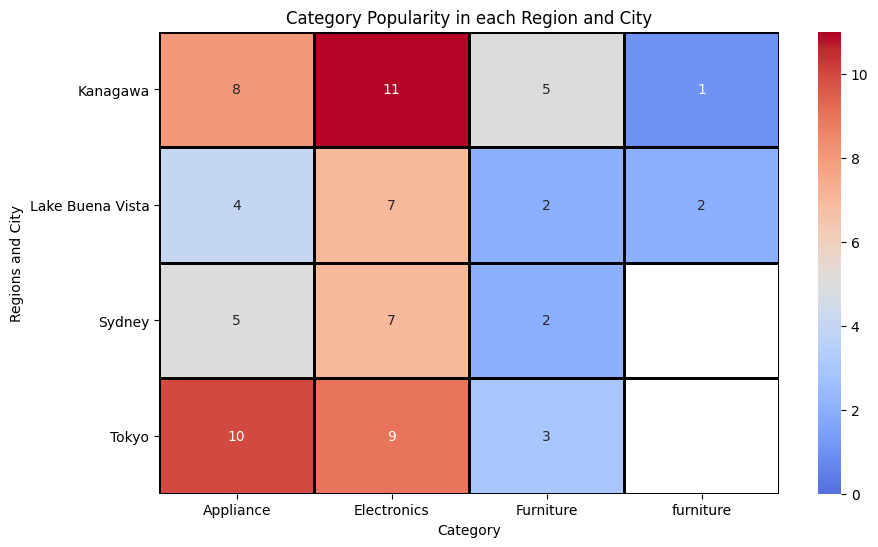

In [51]:
#merged order data with product data
merged_data=pd.merge(order_data,product_data,on ='product_id')
#merged order data with product data
merged_data =pd.merge(merged_data,customer_data, on ='customer_id')

# Exclude non-numeric columns from correlation calculation
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
merged_data_numeric = merged_data[numeric_columns]

# Aggregate the data
agg_data = merged_data.groupby(['city', 'category']).size().reset_index(name='order_count')

# Create a pivot table for the heatmap
pivot_table = agg_data.pivot(index='city', columns='category', values='order_count')


plt.figure(figsize=(10,6))
heatmap=sns.heatmap(pivot_table, annot=True, fmt=".0f", vmin=0, vmax=11, center=5, cmap="coolwarm", linewidths=1,linecolor="Black")
heatmap.set_title("Category Popularity in each Region and City")
heatmap.set_xlabel('Category')
heatmap.set_ylabel('Regions and City')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=0)
plt.show()


# Product Performance: 
### Identify the top 10 best-selling products

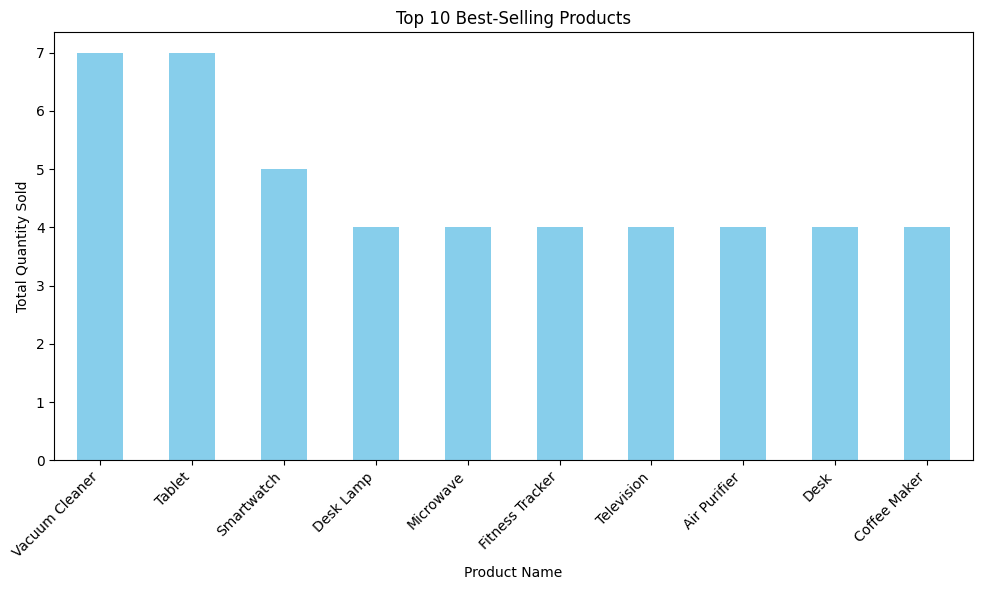

In [52]:
# Merge order_details_data with product_data to get product names
merged_data = pd.merge (order_data, product_data[['product_id', 'product_name']], on='product_id')

#Group merged data by product name and sum the quantities
product_quantity_sold =merged_data.groupby('product_name') ['quantity'].sum()

#Sort products based on total quantity sold
top_products= product_quantity_sold.sort_values (ascending=False).head (10)

#Create a bar plot 
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue') 
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks (rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Identify top 10 slow-moving products based on low sales.

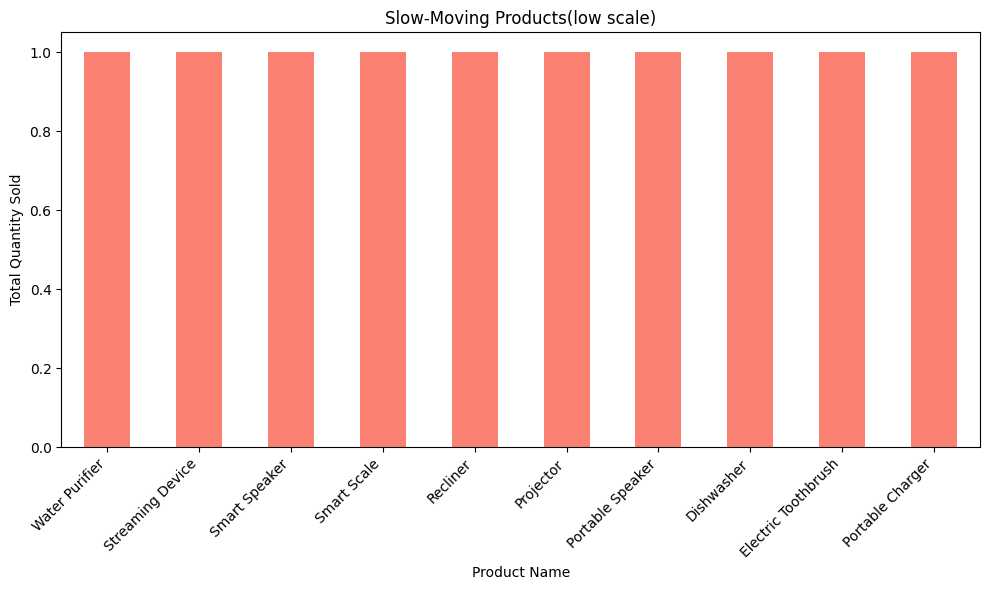

In [53]:
# Merge order_data with product_data to get product names 
merged_data = pd.merge(order_data, product_data[['product_id', 'product_name']], on='product_id')

# Group merged data by product name and sum the quantities 
product_quantity_sold = merged_data.groupby('product_name') ['quantity'].sum()

#Sort products based on total quantity sold in ascending order
slowest_products =product_quantity_sold.sort_values().head(10)

#Create a bar plot
plt.figure(figsize=(10, 6))
slowest_products.plot(kind='bar', color='salmon')
plt.title('Slow-Moving Products(low scale)') 
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks (rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Payment Analysis:
### Display successful and pending payments order counts.

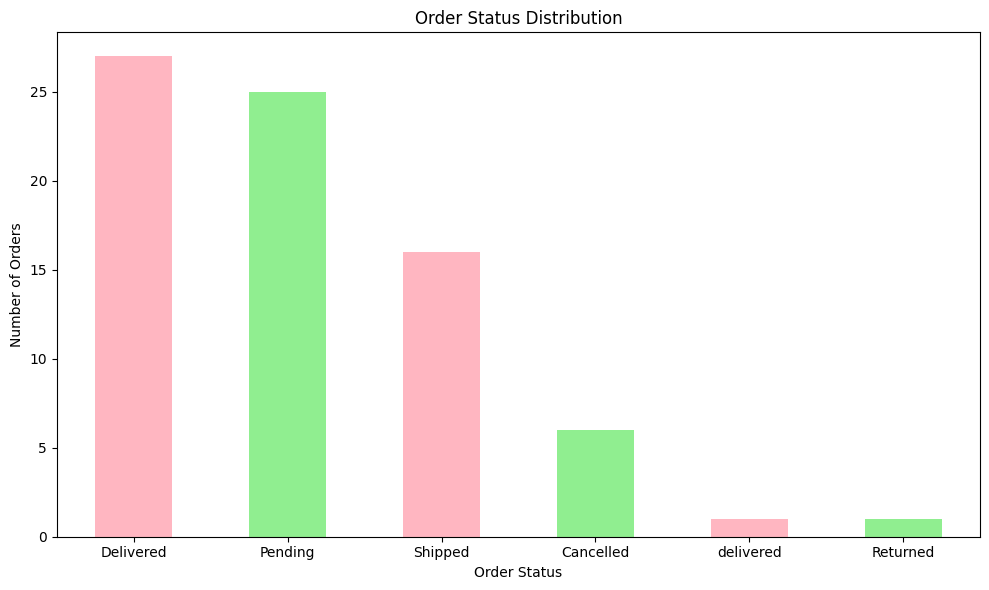

In [54]:
#Group orders by order status and count the occurrences
order_status_counts = order_data['order_status'].value_counts()

#Create a bar plot
plt.figure(figsize=(10, 6))
order_status_counts.plot(kind='bar', color=['lightpink', 'lightgreen'])
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks (rotation=0)
plt.tight_layout()
plt.show()